## 1. Import Libraries

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn

import warnings
warnings.filterwarnings('ignore')

## 2. Import Data

In [2]:
startup = pd.read_csv('50_Startups.csv')

In [3]:
startup.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## 3. Data Understanding

### 3.1 Initial Analysis

In [4]:
startup.shape

(50, 5)

In [5]:
startup.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [6]:
startup.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

### 3.2 Data Cleaning

In [7]:
startup['State'].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

since input feature 'State' is a parametric, we can better go with One Hot Encoding Method.

In [8]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(sparse=False)
ohe_results=pd.DataFrame(ohe.fit_transform(startup[['State']]),columns=('State_New_York','State_California','State_Florida'))

In [9]:
startup.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [10]:
startup=startup.join(ohe_results)

In [11]:
del startup['State']

In [12]:
startup.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_New_York,State_California,State_Florida
0,165349.20,136897.80,471784.10,192261.83,0.0,0.0,1.0
1,162597.70,151377.59,443898.53,191792.06,1.0,0.0,0.0
2,153441.51,101145.55,407934.54,191050.39,0.0,1.0,0.0
3,144372.41,118671.85,383199.62,182901.99,0.0,0.0,1.0
4,142107.34,91391.77,366168.42,166187.94,0.0,1.0,0.0


In [13]:
startup.rename({'R&D Spend':'R&D_Spending','Marketing Spend':'Marketing_Spend'},axis=1,inplace=True)

In [14]:
startup.head()

,R&D_Spending,Administration,Marketing_Spend,Profit,State_New_York,State_California,State_Florida
0,165349.20,136897.80,471784.10,192261.83,0.0,0.0,1.0
1,162597.70,151377.59,443898.53,191792.06,1.0,0.0,0.0
2,153441.51,101145.55,407934.54,191050.39,0.0,1.0,0.0
3,144372.41,118671.85,383199.62,182901.99,0.0,0.0,1.0
4,142107.34,91391.77,366168.42,166187.94,0.0,1.0,0.0


### 3.3 Check Assumption Test

#### Linearity Check

In [15]:
startup.columns

Index(['R&D_Spending', 'Administration', 'Marketing_Spend', 'Profit',
       'State_New_York', 'State_California', 'State_Florida'],
      dtype='object')

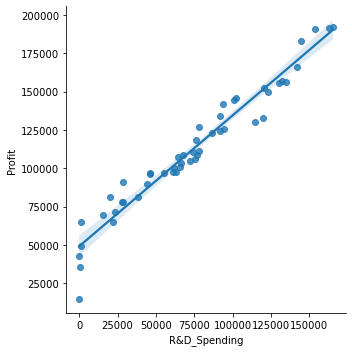

In [16]:
sns.lmplot(x='R&D_Spending',y='Profit',data=startup)
plt.show()

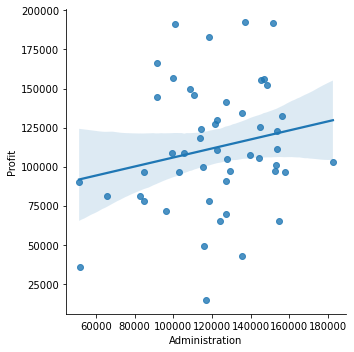

In [17]:
sns.lmplot(x='Administration',y='Profit',data=startup)
plt.show()

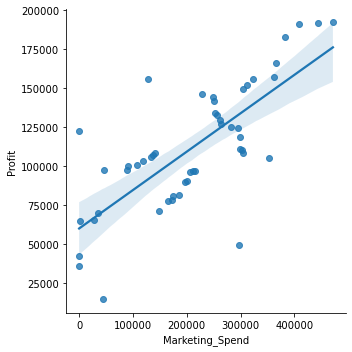

In [18]:
sns.lmplot(x='Marketing_Spend',y='Profit',data=startup)
plt.show()

#### Linearity test is passed for features R&D_Spending and State

### Normality Test

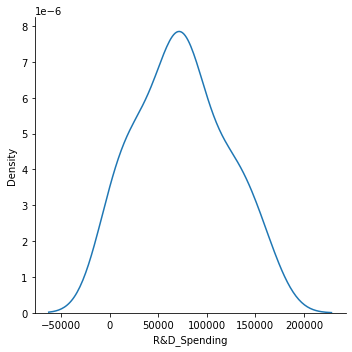

In [19]:
sns.displot(data=startup,x='R&D_Spending',kind='kde')
plt.show()

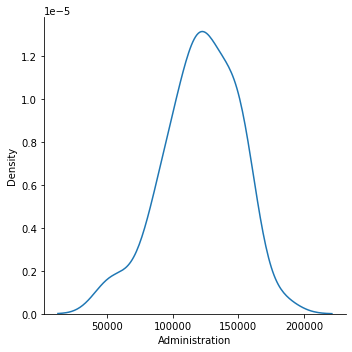

In [20]:
sns.displot(data=startup,x='Administration',kind='kde')
plt.show()

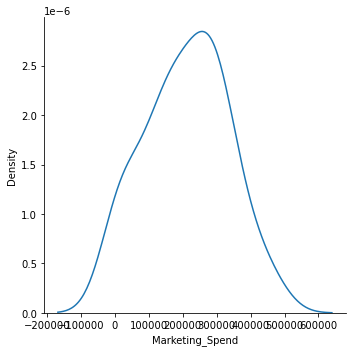

In [21]:
sns.displot(data=startup,x='Marketing_Spend',kind='kde')
plt.show()

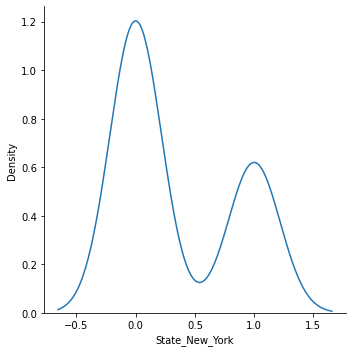

In [22]:
sns.displot(data=startup,x='State_New_York',kind='kde')
plt.show()

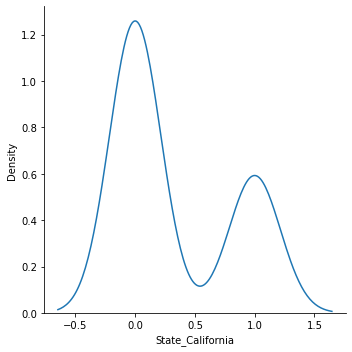

In [23]:
sns.displot(data=startup,x='State_California',kind='kde')
plt.show()

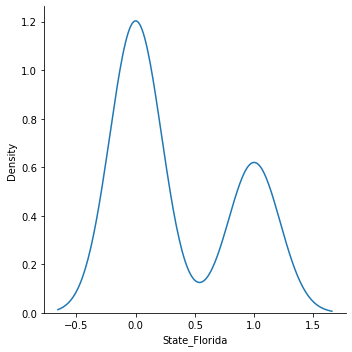

In [24]:
sns.displot(data=startup,x='State_Florida',kind='kde')
plt.show()

#### Normality Test is failed

#### Normality Tet using QQ-Plot

In [25]:
from scipy import stats

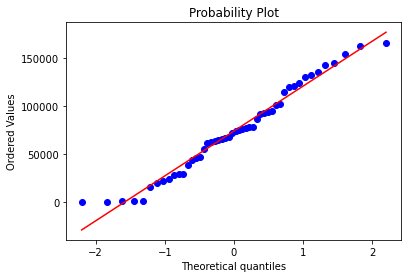

In [26]:
stats.probplot(startup['R&D_Spending'],plot=plt)
plt.show()

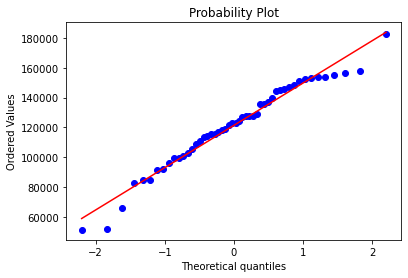

In [27]:
stats.probplot(startup['Administration'],plot=plt)
plt.show()

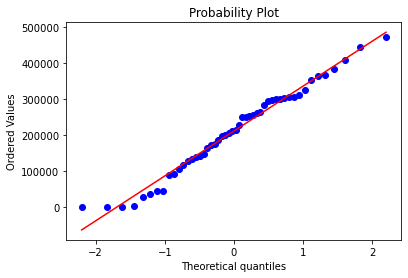

In [28]:
stats.probplot(startup['Marketing_Spend'],plot=plt)
plt.show()

#### Normality Test is failed

### Multicollinearity Test

* corr()
* VIF

In [29]:
startup.corr().round(2)

,R&D_Spending,Administration,Marketing_Spend,Profit,State_New_York,State_California,State_Florida
R&D_Spending,1.00,0.24,0.72,0.97,-0.14,0.11,0.04
Administration,0.24,1.00,-0.03,0.20,-0.02,0.01,0.01
Marketing_Spend,0.72,-0.03,1.00,0.75,-0.17,0.21,-0.03
Profit,0.97,0.20,0.75,1.00,-0.15,0.12,0.03
State_New_York,-0.14,-0.02,-0.17,-0.15,1.00,-0.49,-0.52
State_California,0.11,0.01,0.21,0.12,-0.49,1.00,-0.49
State_Florida,0.04,0.01,-0.03,0.03,-0.52,-0.49,1.00


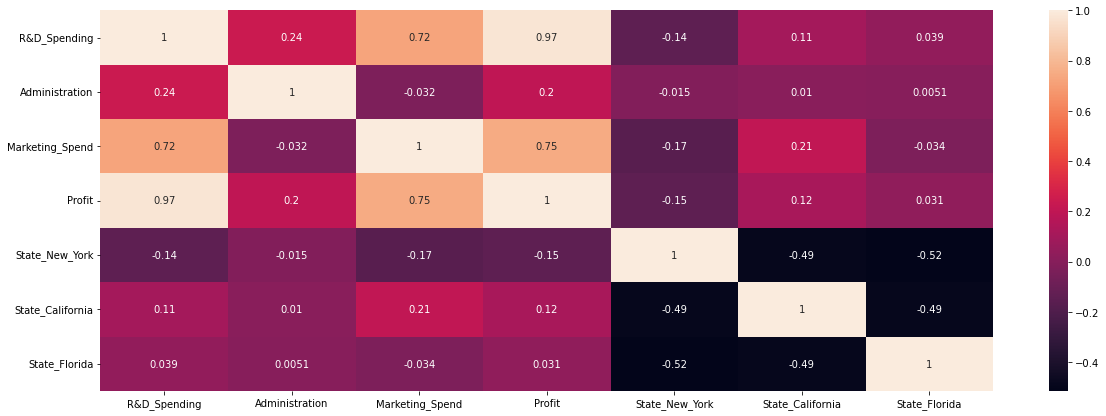

In [30]:
plt.figure(figsize=(20,7))
sns.heatmap(startup.corr(),annot=True)
plt.show()

#### There is multicollinearity (R&D Spending Vs Marketing Spend). Hence Multicollinearity test is failed

### No Auto Regression

#### There is no time based input feature. Hence there is no auto regression.

## EDA

### Box Plot - Outlier Detection

In [31]:
startup.columns

Index(['R&D_Spending', 'Administration', 'Marketing_Spend', 'Profit',
       'State_New_York', 'State_California', 'State_Florida'],
      dtype='object')

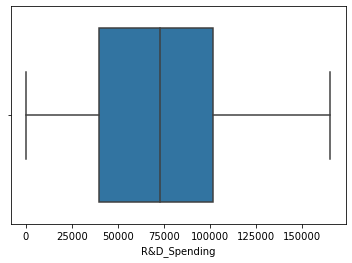

In [32]:
sns.boxplot(x='R&D_Spending',data=startup)
plt.show()

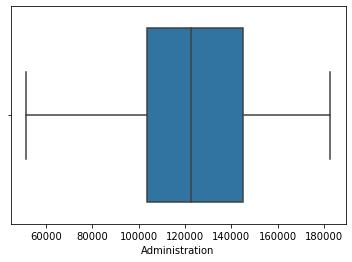

In [33]:
sns.boxplot(x='Administration',data=startup)
plt.show()

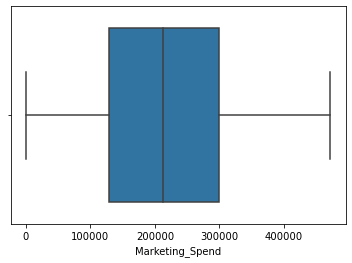

In [34]:
sns.boxplot(x='Marketing_Spend',data=startup)
plt.show()

#### There is no Outlier Present in the Data

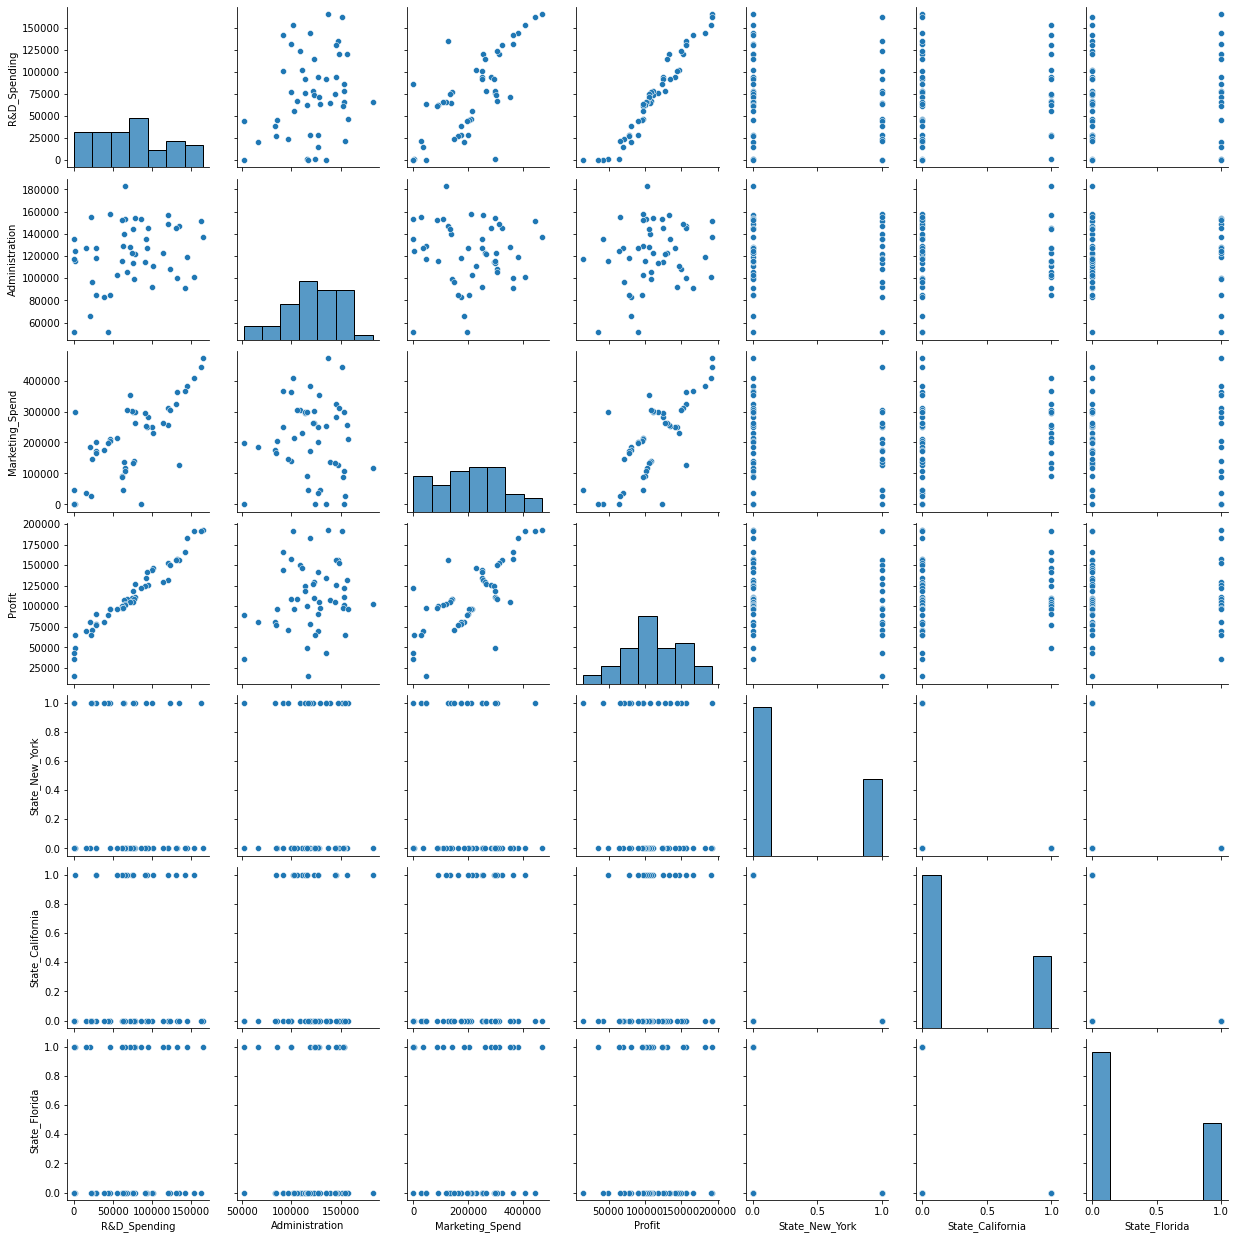

In [35]:
sns.pairplot(startup)
plt.show()

### 4. Model Building

In [36]:
X=startup.drop('Profit',axis=1)
y=startup[['Profit']]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split (X,y,test_size=0.2,random_state=12,shuffle=True,)

### 5. Model Training

In [37]:
from sklearn.linear_model import LinearRegression
startup_model=LinearRegression().fit(X,y)

### 6. Model Testing || 7. Model Evaluation

In [38]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [39]:
y_train_pred=startup_model.predict(X_train)

In [40]:
mean_absolute_error(y_train,y_train_pred)

6629.6022732330675

In [41]:
mean_squared_error(y_train,y_train_pred)

83577314.31546542

In [42]:
r2_score(y_train,y_train_pred)

0.9477968886997755

In [43]:
y_test_pred=startup_model.predict(X_test)

In [44]:
mean_absolute_error(y_test,y_test_pred)

5859.094450114432

In [45]:
mean_squared_error(y_test,y_test_pred)

57724707.17832662

In [46]:
r2_score(y_test,y_test_pred)

0.9580528634578069

## 8. Model Transformation

### Log Transformation

In [47]:
import numpy as np

In [48]:
startup.columns

Index(['R&D_Spending', 'Administration', 'Marketing_Spend', 'Profit',
       'State_New_York', 'State_California', 'State_Florida'],
      dtype='object')

In [49]:
startup1=startup.copy()

In [50]:
startup1['log_R&D_Spending']=np.log(startup1['R&D_Spending'])
startup1['log_Administration']=np.log(startup1['Administration'])
startup1['log_Marketing_Spend']=np.log(startup1['Marketing_Spend'])

In [51]:
startup1

,R&D_Spending,Administration,Marketing_Spend,Profit,State_New_York,State_California,State_Florida,log_R&D_Spending,log_Administration,log_Marketing_Spend
0,165349.20,136897.80,471784.10,192261.83,0.0,0.0,1.0,12.015815,11.826990,13.064277
1,162597.70,151377.59,443898.53,191792.06,1.0,0.0,0.0,11.999034,11.927533,13.003351
2,153441.51,101145.55,407934.54,191050.39,0.0,1.0,0.0,11.941075,11.524316,12.918862
3,144372.41,118671.85,383199.62,182901.99,0.0,0.0,1.0,11.880151,11.684117,12.856311
4,142107.34,91391.77,366168.42,166187.94,0.0,1.0,0.0,11.864338,11.422911,12.810849
5,131876.90,99814.71,362861.36,156991.12,0.0,0.0,1.0,11.789624,11.511071,12.801776
6,134615.46,147198.87,127716.82,156122.51,1.0,0.0,0.0,11.810178,11.899540,11.757571
7,130298.13,145530.06,323876.68,155752.60,0.0,1.0,0.0,11.777580,11.888138,12.688118
8,120542.52,148718.95,311613.29,152211.77,0.0,0.0,1.0,11.699758,11.909814,12.649518
9,123334.88,108679.17,304981.62,149759.96,1.0,0.0,0.0,11.722659,11.596155,12.628007


In [52]:
startup1=startup1.drop(labels=[19,47,48,49],axis=0)

In [53]:
startup1

,R&D_Spending,Administration,Marketing_Spend,Profit,State_New_York,State_California,State_Florida,log_R&D_Spending,log_Administration,log_Marketing_Spend
0,165349.20,136897.80,471784.10,192261.83,0.0,0.0,1.0,12.015815,11.826990,13.064277
1,162597.70,151377.59,443898.53,191792.06,1.0,0.0,0.0,11.999034,11.927533,13.003351
2,153441.51,101145.55,407934.54,191050.39,0.0,1.0,0.0,11.941075,11.524316,12.918862
3,144372.41,118671.85,383199.62,182901.99,0.0,0.0,1.0,11.880151,11.684117,12.856311
4,142107.34,91391.77,366168.42,166187.94,0.0,1.0,0.0,11.864338,11.422911,12.810849
5,131876.90,99814.71,362861.36,156991.12,0.0,0.0,1.0,11.789624,11.511071,12.801776
6,134615.46,147198.87,127716.82,156122.51,1.0,0.0,0.0,11.810178,11.899540,11.757571
7,130298.13,145530.06,323876.68,155752.60,0.0,1.0,0.0,11.777580,11.888138,12.688118
8,120542.52,148718.95,311613.29,152211.77,0.0,0.0,1.0,11.699758,11.909814,12.649518
9,123334.88,108679.17,304981.62,149759.96,1.0,0.0,0.0,11.722659,11.596155,12.628007


In [54]:
log_X=startup1[['State_New_York', 'State_California', 'State_Florida','log_R&D_Spending','log_Administration','log_Marketing_Spend']]
log_y=startup1[['Profit']]

In [55]:
from sklearn.linear_model import LinearRegression
log_model=LinearRegression().fit(log_X,log_y)

In [56]:
from sklearn.model_selection import train_test_split
log_X_train,log_X_test,log_y_train,log_y_test=train_test_split(log_X,log_y,test_size=0.2,random_state=12,shuffle=True)

In [57]:
log_y_train_pred=log_model.predict(log_X_train)

In [58]:
log_y_test_pred=log_model.predict(log_X_test)

In [59]:
mean_absolute_error(log_y_train,log_y_train_pred)

19294.321149753345

In [60]:
mean_absolute_error(log_y_test,log_y_test_pred)

14673.146526126608

In [61]:
mean_squared_error(log_y_train,log_y_train_pred)

542191737.2111346

In [62]:
mean_squared_error(log_y_test,log_y_test_pred)

234834684.1637864

In [63]:
r2_score(log_y_train,log_y_train_pred)

0.60996314946781

In [64]:
r2_score(log_y_test,log_y_test_pred)

0.6184589807384198

### Square Root Transformation

In [65]:
startup2=startup.copy()
startup2.head()

,R&D_Spending,Administration,Marketing_Spend,Profit,State_New_York,State_California,State_Florida
0,165349.20,136897.80,471784.10,192261.83,0.0,0.0,1.0
1,162597.70,151377.59,443898.53,191792.06,1.0,0.0,0.0
2,153441.51,101145.55,407934.54,191050.39,0.0,1.0,0.0
3,144372.41,118671.85,383199.62,182901.99,0.0,0.0,1.0
4,142107.34,91391.77,366168.42,166187.94,0.0,1.0,0.0


In [66]:
startup2['sqrt_R&D_Spending']=np.sqrt(startup2['R&D_Spending'])
startup2['sqrt_Administration']=np.sqrt(startup2['Administration'])
startup2['sqrt_Marketing_Spend']=np.sqrt(startup2['Marketing_Spend'])

In [67]:
startup2

,R&D_Spending,Administration,Marketing_Spend,Profit,State_New_York,State_California,State_Florida,sqrt_R&D_Spending,sqrt_Administration,sqrt_Marketing_Spend
0,165349.20,136897.80,471784.10,192261.83,0.0,0.0,1.0,406.631529,369.997027,686.865416
1,162597.70,151377.59,443898.53,191792.06,1.0,0.0,0.0,403.234051,389.072731,666.257105
2,153441.51,101145.55,407934.54,191050.39,0.0,1.0,0.0,391.716109,318.033882,638.697534
3,144372.41,118671.85,383199.62,182901.99,0.0,0.0,1.0,379.963696,344.487808,619.031195
4,142107.34,91391.77,366168.42,166187.94,0.0,1.0,0.0,376.971272,302.310718,605.118517
5,131876.90,99814.71,362861.36,156991.12,0.0,0.0,1.0,363.148592,315.934661,602.379747
6,134615.46,147198.87,127716.82,156122.51,1.0,0.0,0.0,366.899796,383.665049,357.374901
7,130298.13,145530.06,323876.68,155752.60,0.0,1.0,0.0,360.968323,381.484023,569.101643
8,120542.52,148718.95,311613.29,152211.77,0.0,0.0,1.0,347.192339,385.640960,558.223333
9,123334.88,108679.17,304981.62,149759.96,1.0,0.0,0.0,351.190660,329.665239,552.251410


In [68]:
sqrt_X=startup2[['State_New_York', 'State_California', 'State_Florida','sqrt_R&D_Spending','sqrt_Administration','sqrt_Marketing_Spend']]
sqrt_y=startup2[['Profit']]

In [69]:
from sklearn.linear_model import LinearRegression
sqrt_model=LinearRegression().fit(sqrt_X,sqrt_y)

In [70]:
from sklearn.model_selection import train_test_split
sqrt_X_train,sqrt_X_test,sqrt_y_train,sqrt_y_test=train_test_split(sqrt_X,sqrt_y,test_size=0.2,random_state=12,shuffle=True)

In [71]:
sqrt_y_train_pred=sqrt_model.predict(sqrt_X_train)

In [72]:
sqrt_y_test_pred=sqrt_model.predict(sqrt_X_test)

In [73]:
mean_absolute_error(sqrt_y_train,sqrt_y_train_pred)

10526.084563064976

In [74]:
mean_absolute_error(sqrt_y_test,sqrt_y_test_pred)

7216.112853267727

In [75]:
mean_squared_error(sqrt_y_train,sqrt_y_train_pred)

166044605.52020445

In [76]:
mean_squared_error(sqrt_y_test,sqrt_y_test_pred)

64097153.54308219

In [77]:
r2_score(sqrt_y_train,sqrt_y_train_pred)

0.8962871074074567

In [78]:
r2_score(sqrt_y_train,sqrt_y_train_pred)

0.8962871074074567

### Boxcox Transformation

In [79]:
startup3=startup.copy()
startup3.head()

,R&D_Spending,Administration,Marketing_Spend,Profit,State_New_York,State_California,State_Florida
0,165349.20,136897.80,471784.10,192261.83,0.0,0.0,1.0
1,162597.70,151377.59,443898.53,191792.06,1.0,0.0,0.0
2,153441.51,101145.55,407934.54,191050.39,0.0,1.0,0.0
3,144372.41,118671.85,383199.62,182901.99,0.0,0.0,1.0
4,142107.34,91391.77,366168.42,166187.94,0.0,1.0,0.0


In [80]:
startup3['cbrt_R&D_Spending']=np.cbrt(startup3['R&D_Spending'])
startup3['cbrt_Administration']=np.cbrt(startup3['Administration'])
startup3['cbrt_Marketing_Spend']=np.cbrt(startup3['Marketing_Spend'])

In [81]:
startup3

,R&D_Spending,Administration,Marketing_Spend,Profit,State_New_York,State_California,State_Florida,cbrt_R&D_Spending,cbrt_Administration,cbrt_Marketing_Spend
0,165349.20,136897.80,471784.10,192261.83,0.0,0.0,1.0,54.886731,51.538545,77.848055
1,162597.70,151377.59,443898.53,191792.06,1.0,0.0,0.0,54.580578,53.295089,76.283024
2,153441.51,101145.55,407934.54,191050.39,0.0,1.0,0.0,53.536210,46.592455,74.164629
3,144372.41,118671.85,383199.62,182901.99,0.0,0.0,1.0,52.459974,49.141594,72.634289
4,142107.34,91391.77,366168.42,166187.94,0.0,1.0,0.0,52.184177,45.043870,71.541871
5,131876.90,99814.71,362861.36,156991.12,0.0,0.0,1.0,50.900601,46.387203,71.325842
6,134615.46,147198.87,127716.82,156122.51,1.0,0.0,0.0,51.250524,52.800110,50.359650
7,130298.13,145530.06,323876.68,155752.60,0.0,1.0,0.0,50.696665,52.599817,68.674139
8,120542.52,148718.95,311613.29,152211.77,0.0,0.0,1.0,49.398461,52.981238,67.796196
9,123334.88,108679.17,304981.62,149759.96,1.0,0.0,0.0,49.776991,47.721649,67.311803


In [82]:
cbrt_X=startup3[['State_New_York', 'State_California', 'State_Florida','cbrt_R&D_Spending','cbrt_Administration','cbrt_Marketing_Spend']]
cbrt_y=startup3[['Profit']]

In [83]:
from sklearn.linear_model import LinearRegression
cbrt_model=LinearRegression().fit(cbrt_X,cbrt_y)

In [84]:
from sklearn.model_selection import train_test_split
cbrt_X_train,cbrt_X_test,cbrt_y_train,cbrt_y_test=train_test_split(cbrt_X,cbrt_y,test_size=0.2,random_state=12,shuffle=True)

In [85]:
cbrt_y_train_pred=cbrt_model.predict(cbrt_X_train)

In [86]:
cbrt_y_test_pred=cbrt_model.predict(cbrt_X_test)

In [87]:
mean_absolute_error(cbrt_y_train,cbrt_y_train_pred)

14417.979411127453

In [88]:
mean_absolute_error(cbrt_y_test,cbrt_y_test_pred)

9453.425544293841

In [89]:
mean_squared_error(cbrt_y_train,cbrt_y_train_pred)

296329778.6128081

In [90]:
mean_squared_error(cbrt_y_test,cbrt_y_test_pred)

116552683.47500892

In [91]:
r2_score(cbrt_y_train,cbrt_y_train_pred)

0.814909864701972

In [92]:
r2_score(cbrt_y_train,cbrt_y_train_pred)

0.814909864701972

In [93]:
R2_Results=pd.DataFrame({'R2 Score Training Data':[r2_score(y_train,y_train_pred),r2_score(log_y_train,log_y_train_pred),r2_score(sqrt_y_train,sqrt_y_train_pred),r2_score(cbrt_y_train,cbrt_y_train_pred)],
              'R2 Score Testing Data':[r2_score(y_test,y_test_pred),r2_score(log_y_test,log_y_test_pred),r2_score(sqrt_y_test,sqrt_y_test_pred),r2_score(cbrt_y_test,cbrt_y_test_pred)]},index=['Linear Model','Log Model','Square Root Model','Cube Root Model'])

In [94]:
R2_Results

,R2 Score Training Data,R2 Score Testing Data
Linear Model,0.947797,0.958053
Log Model,0.609963,0.618459
Square Root Model,0.896287,0.953422
Cube Root Model,0.814910,0.915304


#### We can observe from above table that Linear Model has Highest R2 score for both Training and Test dataset

### End !!!